## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_study_merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [62]:
# Checking the number of mice.
totalmice = len(mouse_study_merged_df["Mouse ID"].unique())
totalmice

249

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ct = mouse_study_merged_df.groupby("Mouse ID").count()["Timepoint"]

#Create a dataframe of timepoint counts by mouse, then sort high-low to see which mouse has the most timepoints
duplmice_df = pd.DataFrame({"Timepoint Ct":mouse_ct})
duplmice_sort_df = duplmice_df.sort_values("Timepoint Ct", ascending=False)

duplmice_sort_df


,Timepoint Ct
Mouse ID,
g989,13
a203,10
n364,10
m546,10
m550,10
...,...
x226,1
b447,1
f932,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# from above it looks like g989 has more time points than any other and might be the issue
# create this dataframe to isolate just that mouse ID
g989_df = mouse_study_merged_df.loc[mouse_study_merged_df["Mouse ID"]=="g989"]
g989_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# g989 does have duplicate tumor volumes for the same timepoint which is a problem and means the data is probably not accurate
# Used the inverse of previous data frame, by selecting all mouse IDs except for the problem g989
clean_mousedata_df = mouse_study_merged_df.loc[mouse_study_merged_df["Mouse ID"]!="g989"]
clean_mousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
micecount = len(clean_mousedata_df["Mouse ID"].unique())
micecount

248

In [7]:
uniquemouse_time_ct = clean_mousedata_df.groupby("Mouse ID").count()["Timepoint"]
uniquemouse_time_ct

#Create a dataframe of timepoint counts by mouse, then sort high-low to see which mouse has the most timepoints
timescheck_df = pd.DataFrame({"Timepoint Ct":uniquemouse_time_ct})
timescheck_sort_df = timescheck_df.sort_values("Timepoint Ct", ascending=False)

timescheck_sort_df

,Timepoint Ct
Mouse ID,
a203,10
l897,10
m546,10
m550,10
m601,10
...,...
d133,1
b447,1
u153,1


In [8]:
drugsort_df = clean_mousedata_df.loc[clean_mousedata_df["Drug Regimen"]=="Capomulin"]
drugsort_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [9]:
drugmin = drugsort_df["Tumor Volume (mm3)"].min()
drugmax = drugsort_df["Tumor Volume (mm3)"].max()
drugmin, drugmax

(23.34359787, 48.15820939)

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Set up variables and calculate the requested measures
mean_tumorvol = clean_mousedata_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumorvol = clean_mousedata_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_tumorvol = clean_mousedata_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_tumorvol = clean_mousedata_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumorvol = clean_mousedata_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
min_tumorvol = clean_mousedata_df.groupby("Drug Regimen").min()["Tumor Volume (mm3)"]
max_tumorvol = clean_mousedata_df.groupby("Drug Regimen").max()["Tumor Volume (mm3)"]

# Combine calcs into a summary dataframe
summarystats_df = pd.DataFrame({"Mean Tumor Volumes":mean_tumorvol, "Median Tumor Volume":median_tumorvol, "Tumor Volume Variance":var_tumorvol,
                               "StDev Tumor Volumes":std_tumorvol, "SEM Tumor Volumes":sem_tumorvol,
                               "Min Tumor Volume":min_tumorvol, "Max Tumor Volume":max_tumorvol})

summarystats_df


,Mean Tumor Volumes,Median Tumor Volume,Tumor Volume Variance,StDev Tumor Volumes,SEM Tumor Volumes,Min Tumor Volume,Max Tumor Volume
Drug Regimen,,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,23.343598,48.158209
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,45.000000,68.923185
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,36.321346,72.226731
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,45.000000,78.567014
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,45.000000,76.668817
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,45.000000,73.212939
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,45.000000,72.455421
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,22.050126,47.622816
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,45.000000,75.123690


In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# Researched method in the pandas documentation under groupby.aggregate as well as an article on geeksforgeeks.org. 
# Took a lot of trial/error to get the syntax correct - did we cover in class?
# Matches what I did above numerically so I think it's calculating correctly
summstatsagg_df = clean_mousedata_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem', 'min', 'max']})
summstatsagg_df

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                                    
                    min        max  
Drug Regimen                        
Capomulin     23.343598  48.158209  
Ceftamin      45.000000  68.923185  
Infubinol     36.321346  72.226731  
Ketapril      45.000000  78.567014  
Naftisol      45.000000  76.668817  
Placebo       45.000000  73.212939  
Propriva      45.000000  72.455421  
Ramicane      22.050126  47.622816  
Stelasyn      45.000000  75.123690  
Zoniferol     45.000000  73.324432

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of mice tested per drug')

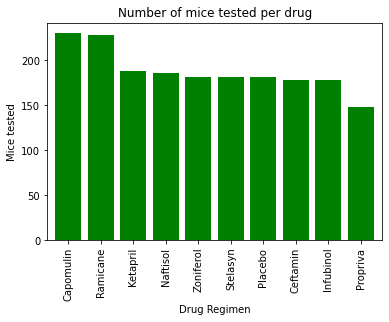

In [77]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Get mouse count per drug for y axis - not sure this is getting me the right values
#mousectperdrug = clean_mousedata_df.groupby("Drug Regimen").count()["Mouse ID"]
#mousectperdrug

drugcts = clean_mousedata_df["Drug Regimen"].value_counts()
#drugcts

# Plot using pandas (used the battling kings activity as a template...correct?)
drugcts.plot(kind="bar", width=0.8, facecolor="green")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice tested")
plt.title("Number of mice tested per drug")

# See if you can get the bars to be ordered the same as the next pyplot figure.
# Bar width need fixing to make them identical?

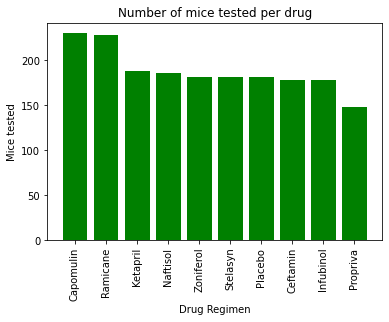

In [78]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Get mouse count per drug for y axis - THIS WAS FIRST ATTEMPT - counts did not match drugs like I was expecting...
#mousectperdrug = clean_mousedata_df.groupby("Drug Regimen").count()["Mouse ID"]
#mousectperdrug

# Second attempt to get the correct counts - this worked and the graph looks more correct 
#UPDATE: maybe not, naftisol shouldn't be lowest ct
drugcts = clean_mousedata_df["Drug Regimen"].value_counts()
#drugcts

# Get drug names for x axis - this is where my problem is - list is not in the right order
#drugs_tested = clean_mousedata_df["Drug Regimen"].unique()
#drugs_tested
# Found the '.index' tip on stack overflow - pulls the index values from the drugcts variable that I set above, which lines it all up

# Generate the bar plot
#plt.bar(drugs_tested, mousectperdrug, color="green", align="center")
plt.bar(drugcts.index, drugcts, color="green", align="center")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice tested")
plt.title("Number of mice tested per drug")
plt.show()


In [79]:
# Checking the drug count per moust from the cleaned DF - something is off with my pyplot bar graph
# Used this count in the above graph and it seemed to fix the issue - using the .index matched it up correctly.
drugcts = clean_mousedata_df["Drug Regimen"].value_counts()
drugcts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [80]:
mousectperdrug = clean_mousedata_df.groupby("Drug Regimen").count()["Mouse ID"]
mousectperdrug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Mouse Gender Distribution')

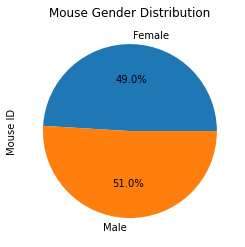

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mousesex = clean_mousedata_df.groupby("Sex").count()["Mouse ID"]

mousesex.plot(kind="pie", autopct="%1.1f%%", subplots=True)
plt.title("Mouse Gender Distribution")


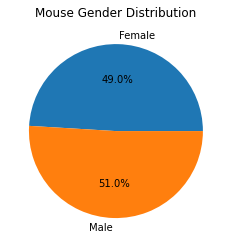

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mousesex = clean_mousedata_df.groupby("Sex").count()["Mouse ID"]
labels = ["Female", "Male"]

plt.pie(mousesex, labels=labels, autopct="%1.1f%%", startangle=0)
plt.title("Mouse Gender Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#     - Found that if I take off timepoint in the next line, I get the first data frame sorted - why not just use that?
#       It has the info that I think I need = last time point for each mouse and final tumor volue
last_time_df = clean_mousedata_df.groupby("Mouse ID").max()["Timepoint"]
last_time_df


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [84]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# tried a few versions of this but kept getting large data sets back. Seems I have all the info in the above df?
merged_mousedata_df = pd.merge(last_time_df, clean_mousedata_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_mousedata_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [85]:
min_tumorvol = merged_mousedata_df.groupby("Drug Regimen").min()["Tumor Volume (mm3)"]
max_tumorvol = merged_mousedata_df.groupby("Drug Regimen").max()["Tumor Volume (mm3)"]
min_tumorvol, max_tumorvol

(Drug Regimen
 Capomulin    23.343598
 Ceftamin     45.000000
 Infubinol    36.321346
 Ketapril     45.000000
 Naftisol     45.000000
 Placebo      45.000000
 Propriva     45.000000
 Ramicane     22.050126
 Stelasyn     45.000000
 Zoniferol    45.000000
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Capomulin    47.685963
 Ceftamin     68.923185
 Infubinol    72.226731
 Ketapril     78.567014
 Naftisol     76.668817
 Placebo      73.212939
 Propriva     72.455421
 Ramicane     45.220869
 Stelasyn     75.123690
 Zoniferol    73.324432
 Name: Tumor Volume (mm3), dtype: float64)

In [86]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = clean_mousedata_df["Drug Regimen"].unique()
drugs

# Create empty list to fill with tumor vol data (for plotting)
# did this later on....

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Done in next cells
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    
    # add subset     
    
    # Determine outliers using upper and lower bounds   

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [87]:
# Split the merged mouse data df into the four regimens of interest: Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = merged_mousedata_df.loc[merged_mousedata_df["Drug Regimen"]=="Capomulin"]
ramicane_df = merged_mousedata_df.loc[merged_mousedata_df["Drug Regimen"]=="Ramicane"]
infubinol_df = merged_mousedata_df.loc[merged_mousedata_df["Drug Regimen"]=="Infubinol"]
ceftamin_df = merged_mousedata_df.loc[merged_mousedata_df["Drug Regimen"]=="Ceftamin"]

capomulin_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [88]:
# Calculate IQR for each drug
# Capomulin
capquart = capomulin_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
caplowq = capquart[0.25]
capupq = capquart[0.75]
capiqr = capupq - caplowq
print(f"The iqr for Capomulin is {capiqr}")

caplowbound = caplowq - (1.5*capiqr)
capupbound = capupq + (1.5*capiqr)
print(f"Values below {caplowbound} or above {capupbound} could be outliers")
      
# Ramicane
ramquart = ramicane_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
ramlowq = ramquart[0.25]
ramupq = ramquart[0.75]
ramiqr = ramupq - ramlowq
print(f"The iqr for Ramicane is {ramiqr}")

ramlowbound = ramlowq - (1.5*ramiqr)
ramupbound = ramupq + (1.5*ramiqr)
print(f"Values below {ramlowbound} or above {ramupbound} could be outliers")

# Infubinol
infquart = infubinol_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
inflowq = infquart[0.25]
infupq = infquart[0.75]
infiqr = infupq - inflowq
print(f"The iqr for Infubinol is {infiqr}")

inflowbound = inflowq - (1.5*infiqr)
infupbound = infupq + (1.5*infiqr)
print(f"Values below {inflowbound} or above {infupbound} could be outliers")

# Ceftamin
cefquart = ceftamin_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
ceflowq = cefquart[0.25]
cefupq = cefquart[0.75]
cefiqr = cefupq - ceflowq
print(f"The iqr for Ceftamin is {cefiqr}")

ceflowbound = ceflowq - (1.5*cefiqr)
cefupbound = cefupq + (1.5*cefiqr)
print(f"Values below {ceflowbound} or above {cefupbound} could be outliers")


The iqr for Capomulin is 7.781863460000004
Values below 20.70456164999999 or above 51.83201549 could be outliers
The iqr for Ramicane is 9.098536719999998
Values below 17.912664470000003 or above 54.30681135 could be outliers
The iqr for Infubinol is 11.477135160000003
Values below 36.83290494999999 or above 82.74144559000001 could be outliers
The iqr for Ceftamin is 15.577752179999997
Values below 25.355449580000002 or above 87.66645829999999 could be outliers


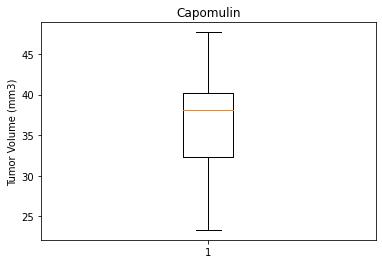

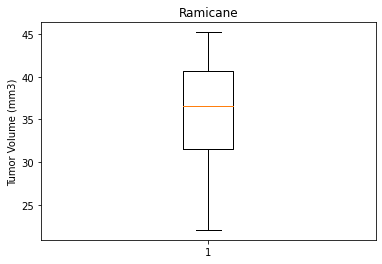

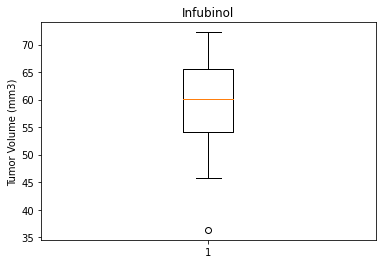

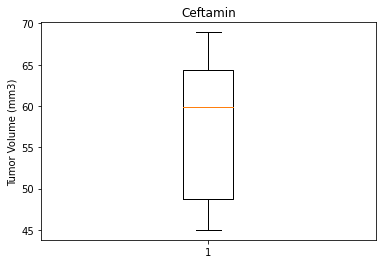

In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin
#fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1, sharex=True)
#fig1.suptitle("Final Tumor Volume for each Drug")

captumorvol = capomulin_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(captumorvol)
plt.show()

# Ramicane
ramtumorvol = ramicane_df["Tumor Volume (mm3)"]
fig1, ax2 = plt.subplots()
ax2.set_title("Ramicane")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.boxplot(ramtumorvol)
plt.show()

# Infubinol
inftumorvol = infubinol_df["Tumor Volume (mm3)"]
fig1, ax3 = plt.subplots()
ax3.set_title("Infubinol")
ax3.set_ylabel("Tumor Volume (mm3)")
ax3.boxplot(inftumorvol)
plt.show()

# Ceftamin
ceftumorvol = ceftamin_df["Tumor Volume (mm3)"]
fig1, ax4 = plt.subplots()
ax4.set_title("Ceftamin")
ax4.set_ylabel("Tumor Volume (mm3)")
ax4.boxplot(ceftumorvol)
plt.show()


In [90]:
# Pull out just the tumor vols and put them into lists. Found this method through a google search that took me back to pandas doc and a geeksforgeeks article
capvols = capomulin_df["Tumor Volume (mm3)"].tolist()
ramvols = ramicane_df["Tumor Volume (mm3)"].tolist()
infvols = infubinol_df["Tumor Volume (mm3)"].tolist()
cefvols = ceftamin_df["Tumor Volume (mm3)"].tolist()

capvols.sort()
ramvols.sort()
infvols.sort()
cefvols.sort()

infvols


[36.321345799999996,
 45.69933088,
 46.25011212,
 47.01036401,
 50.00513807,
 51.54243058,
 54.04860769,
 54.65654872,
 55.62942846,
 55.65068132,
 57.03186187,
 58.26844248,
 60.16518046,
 60.91876652,
 60.96971133,
 62.11727887,
 62.43540402,
 62.75445141,
 65.52574285,
 66.08306589,
 66.19691151,
 67.28962147,
 67.68556862,
 67.97341878,
 72.2267309]

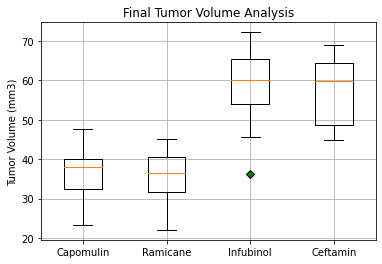

In [91]:
green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot([capvols, ramvols, infvols, cefvols],labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=green_diamond)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volume Analysis")
plt.grid(True)
plt.show()

# Come back and add a title and clean it up a bit

## Line and Scatter Plots

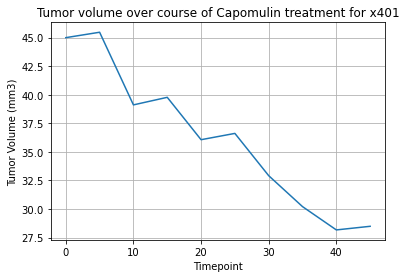

In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# x401 was treated with Capomulin - created a dataframe to house data for just this mouse ID
x401_df = clean_mousedata_df.loc[clean_mousedata_df["Mouse ID"]=="x401"]
#x401_df

plt.plot(x401_df["Timepoint"], x401_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor volume over course of Capomulin treatment for x401")
plt.grid(True)
plt.show()

# Come back and clean up some of the formatting for this figure

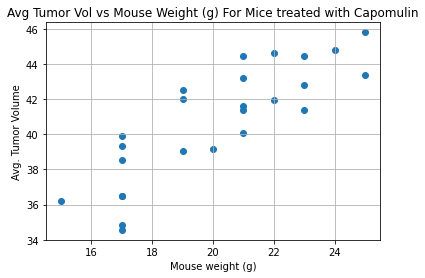

In [93]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_mousedata_df.loc[clean_mousedata_df["Drug Regimen"]=="Capomulin"]
#capomulin_df

avgtumorvol = capomulin_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
#avgtumorvol
mousewt = capomulin_df.groupby("Mouse ID").mean()["Weight (g)"]
#mousewt

plt.scatter(mousewt, avgtumorvol)
plt.xlabel("Mouse weight (g)")
plt.ylabel("Avg. Tumor Volume")
plt.title("Avg Tumor Vol vs Mouse Weight (g) For Mice treated with Capomulin")
plt.grid(True)
plt.show()

## Correlation and Regression

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation coefficient
correlation = st.pearsonr(mousewt, avgtumorvol)
print(f"The correlation coefficient between mouse weight and avg tumor volume is : {round(correlation[0],2)}")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mousewt, avgtumorvol)
regress_values = mousewt*slope+intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))

The correlation coefficient between mouse weight and avg tumor volume is : 0.84


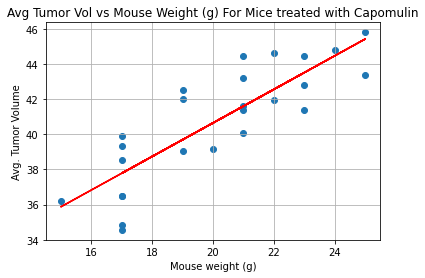

In [95]:
# Scatter plot with linear regression applied
plt.scatter(mousewt, avgtumorvol)
plt.plot(mousewt, regress_values, "r-")

plt.xlabel("Mouse weight (g)")
plt.ylabel("Avg. Tumor Volume")
plt.title("Avg Tumor Vol vs Mouse Weight (g) For Mice treated with Capomulin")
plt.grid(True)
plt.show()

In [71]:
mouse_drug_corr = clean_mousedata_df.corr()
mouse_drug_corr.unstack().sort_values()

Timepoint           Weight (g)           -0.086472
Weight (g)          Timepoint            -0.086472
Age_months          Weight (g)            0.003923
Weight (g)          Age_months            0.003923
Timepoint           Age_months            0.015173
Age_months          Timepoint             0.015173
                    Tumor Volume (mm3)    0.039755
Tumor Volume (mm3)  Age_months            0.039755
Metastatic Sites    Age_months            0.057422
Age_months          Metastatic Sites      0.057422
Weight (g)          Metastatic Sites      0.172617
Metastatic Sites    Weight (g)            0.172617
Timepoint           Tumor Volume (mm3)    0.443380
Tumor Volume (mm3)  Timepoint             0.443380
                    Metastatic Sites      0.533806
Metastatic Sites    Tumor Volume (mm3)    0.533806
Tumor Volume (mm3)  Weight (g)            0.588128
Weight (g)          Tumor Volume (mm3)    0.588128
Metastatic Sites    Timepoint             0.646026
Timepoint           Metastatic 